In [2]:
import heapq
from collections import defaultdict
import pandas as pd
import matplotlib.pylab as plt
#!pip install mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [34]:
import numpy as np
import seaborn as sns

In [7]:
trans_dict = {'Transaction': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'Item1': ['red','white','white','red','red','white','red','red','red','yellow'],
              'Item2': ['white','orange','blue','white','blue','blue','blue','white','white',''],
              'Item3': ['green','','','orange','','','','blue','blue',''],
              'Item4': ['','','','','','','','green','','']}

In [14]:
trans_df = pd.DataFrame(trans_dict, index= trans_dict['Transaction'])
trans_df

,Transaction,Item1,Item2,Item3,Item4
1,1,red,white,green,
2,2,white,orange,,
3,3,white,blue,,
4,4,red,white,orange,
5,5,red,blue,,
6,6,white,blue,,
7,7,red,blue,,
8,8,red,white,blue,green
9,9,red,white,blue,
10,10,yellow,,,


In [15]:
trans_df = trans_df.drop(columns='Transaction')
trans_df

,Item1,Item2,Item3,Item4
1,red,white,green,
2,white,orange,,
3,white,blue,,
4,red,white,orange,
5,red,blue,,
6,white,blue,,
7,red,blue,,
8,red,white,blue,green
9,red,white,blue,
10,yellow,,,


In [16]:
#Load and preprocess the dataset
fp_df = pd.read_csv('Faceplate.csv')
fp_df.set_index('Transaction',inplace=True)
print(fp_df)

             Red  White  Blue  Orange  Green  Yellow
Transaction                                         
1              1      1     0       0      1       0
2              0      1     0       1      0       0
3              0      1     1       0      0       0
4              1      1     0       1      0       0
5              1      0     1       0      0       0
6              0      1     1       0      0       0
7              1      0     1       0      0       0
8              1      1     1       0      1       0
9              1      1     1       0      0       0
10             0      0     0       0      0       1


In [18]:
# create frequent itemsets
itemsets = apriori(fp_df, min_support=0.2, use_colnames= True)
# convert into rules
rules = association_rules(itemsets, metric='confidence', min_threshold=0.5)
rules.sort_values(by=['lift'], ascending = False).head(6)
print(rules.sort_values(by=['lift'], ascending = False)
      .drop(columns=['antecedent support', 'consequent support', 'conviction'])
      .head(6))

       antecedents   consequents  support  confidence      lift  leverage
13    (White, Red)       (Green)      0.2         0.5  2.500000      0.12
15         (Green)  (White, Red)      0.2         1.0  2.500000      0.12
4          (Green)         (Red)      0.2         1.0  1.666667      0.08
12  (White, Green)         (Red)      0.2         1.0  1.666667      0.08
7         (Orange)       (White)      0.2         1.0  1.428571      0.06
8          (Green)       (White)      0.2         1.0  1.428571      0.06


If orange is purchased, then with confidence 100% white will also be purchased. This rule has a lift
ratio of 1.43.If orange is purchased, then with confidence 100% white will also be purchased. This rule has a lift
ratio of 1.43.

In [19]:
# load dataset
all_books_df = pd.read_csv('CharlesBookClub.csv')
# create the binary incidence matrix
ignore = ['Seq#', 'ID#', 'Gender', 'M', 'R', 'F', 'FirstPurch', 'Related Purchase',
 'Mcode', 'Rcode', 'Fcode', 'Yes_Florence', 'No_Florence']
count_books = all_books_df.drop(columns=ignore)
count_books[count_books > 0] = 1
# create frequent itemsets and rules
itemsets = apriori(count_books, min_support=200/4000, use_colnames=True)
rules = association_rules(itemsets, metric='confidence', min_threshold=0.5)
# Display 25 rules with highest lift
rules.sort_values(by=['lift'], ascending=False).head(25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
64,"(RefBks, YouthBks)","(ChildBks, CookBks)",0.08125,0.24200,0.05525,0.680000,2.809917,0.035588,2.368750
73,"(RefBks, DoItYBks)","(ChildBks, CookBks)",0.09250,0.24200,0.06125,0.662162,2.736207,0.038865,2.243680
60,"(DoItYBks, YouthBks)","(ChildBks, CookBks)",0.10325,0.24200,0.06700,0.648910,2.681448,0.042014,2.158993
80,"(RefBks, GeogBks)","(ChildBks, CookBks)",0.08175,0.24200,0.05025,0.614679,2.539995,0.030467,1.967190
69,"(YouthBks, GeogBks)","(ChildBks, CookBks)",0.10450,0.24200,0.06325,0.605263,2.501087,0.037961,1.920267
77,"(DoItYBks, GeogBks)","(ChildBks, CookBks)",0.10100,0.24200,0.06050,0.599010,2.475248,0.036058,1.890321
66,"(ChildBks, CookBks, GeogBks)",(YouthBks),0.10950,0.23825,0.06325,0.577626,2.424452,0.037162,1.803495
72,"(RefBks, ChildBks, CookBks)",(DoItYBks),0.10350,0.25475,0.06125,0.591787,2.323013,0.034883,1.825642
48,"(DoItYBks, GeogBks)",(YouthBks),0.10100,0.23825,0.05450,0.539604,2.264864,0.030437,1.654554
61,"(RefBks, ChildBks, CookBks)",(YouthBks),0.10350,0.23825,0.05525,0.533816,2.240573,0.030591,1.634013


In reviewing these rules, we see that the information can be compressed. Rules 70, 71, 72, 73 involve the
same four book types, with different antecedents and consequents. The same is true of rules 56, 58, 60
as well as 22 and 25 (the same trio of items). (Item groups like this are easy to track down by looking for
rows that share the same support.) This does not mean that the rules are not useful. On the contrary, it
can reduce the number of itemsets to be considered for possible action from a business perspective.

In [20]:
groceries = pd.read_csv('groceries - groceries.csv')
groceries.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#let's create a list of list of transaction
records = []
for i in range(0, len(groceries)):
    records.append([str(groceries.values[i,j]) for j in range(1, groceries.values[i, 0]+1)])
records

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter mi

In [24]:
#Let's analyze the no. of items wrt each transaction
counts = [len(record) for record in records]
print(f'50 percent of the transactions are having items below or equal to {np.quantile(counts, .5)} only')
print(f'particular transaction having a maximum of {np.quantile(counts, 1)} items in it')

50 percent of the transactions are having items below or equal to 3.0 only
particular transaction having a maximum of 32.0 items in it


In [25]:
#Let's encode the created list of list like onehot encode

from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
onehot = te.fit_transform(records)
onehot = pd.DataFrame(onehot, columns = te.columns_)

In [26]:
onehot

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
onehot = onehot.loc[:, ['bottled beer', 'bottled water', 'brandy', 'brown bread', 'butter', 'syrup',
                    'sweet spreads', 'beverages', 'berries', 'beef', 'bathroom cleaner', 'baking powder', 'bags',
                    'baby food', 'baby cosmetics', 'Instant food products', 'tea', 'toilet cleaner', 'vinegar', 'waffles', 'whisky',
                    'white bread', 'white wine', 'yogurt', 'zwieback', 'whole milk', 'whipped/sour cream', 'abrasive cleaner']]

In [29]:
frequent_itemsets=apriori(onehot, min_support=0.0001, use_colnames=True, max_len=3)
frequent_itemsets

,support,itemsets
0,0.080529,(bottled beer)
1,0.110524,(bottled water)
2,0.004169,(brandy)
3,0.064870,(brown bread)
4,0.055414,(butter)
...,...,...
1006,0.010880,"(yogurt, whole milk, whipped/sour cream)"
1007,0.000712,"(abrasive cleaner, yogurt, whole milk)"
1008,0.000102,"(abrasive cleaner, yogurt, whipped/sour cream)"
1009,0.000203,"(whole milk, whipped/sour cream, zwieback)"


In [30]:
#Generating Association rule with mlxtend's association_rules
rules=association_rules(frequent_itemsets)

In [31]:
#Pruning the generated rules using multiple filters

targeted_rules = rules[rules['antecedents'] == {'baby food'}].copy()

In [32]:
filtered_rules = targeted_rules[(targeted_rules['confidence'] > 0.85) &
                                (targeted_rules['lift'] > 1.00)]

<AxesSubplot:xlabel='antecedents', ylabel='consequents'>

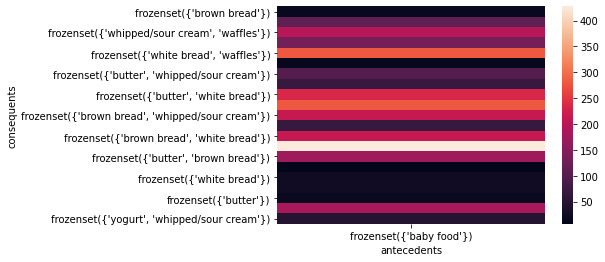

In [35]:
#let's analyse the 'baby foods' relevent consequents

support_table = filtered_rules.pivot(index='consequents', columns='antecedents', values='lift')
sns.heatmap(support_table)